In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings; warnings.simplefilter('ignore')

In [3]:
torch.__version__

'1.4.0'

## Import Data

In [4]:
path = '../data/STLF_DATA_IN_1.xls'
df_load = pd.read_excel(path,sheet_name=0,header=None)
df_weather = pd.read_excel(path, sheet_name=1, header=None)

## Data analysis

### Clean df_weather

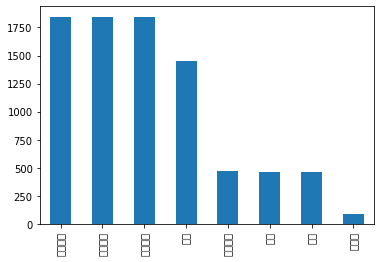

In [5]:
plt.figure()
# plt.rcParams['font.sans-serif']=['SimHei']
weather_type = df_weather[1].value_counts(sort=True)
weather_type.plot.bar()
plt.savefig('../img/weather_type.png')

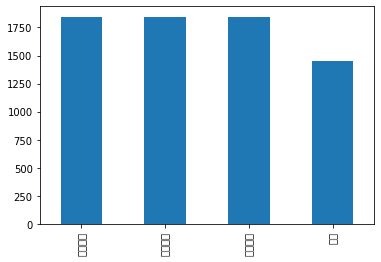

In [6]:
df_weather = df_weather.drop(df_weather[df_weather[1] == "天气类型"].index)
df_weather = df_weather.drop(df_weather[df_weather[1] == "风向"].index)
df_weather = df_weather.drop(df_weather[df_weather[1] == "风速"].index)
df_weather = df_weather.drop(df_weather[df_weather[1] == "降雨量"].index)
weather_type = df_weather[1].value_counts(sort=True)
weather_type.plot.bar()
plt.savefig('../img/weather_type2.png')

In [7]:
df_max_tempe = df_weather.loc[df_weather[1] == "最高温度", [0, 2]]
df_min_tempe = df_weather.loc[df_weather[1] == "最低温度", [0, 2]]
df_avg_tempe = df_weather.loc[df_weather[1] == "平均温度", [0, 2]]
df_humidity = df_weather.loc[df_weather[1] == "湿度", [0, 2]]

df_weather2 = pd.merge(df_max_tempe, df_min_tempe, how='left', on=[0, 0])
df_weather2 = pd.merge(df_weather2, df_avg_tempe, how='left', on=[0, 0])
df_weather2 = pd.merge(df_weather2, df_humidity, how='left', on=[0, 0])

df_weather2.isna().sum()

0        0
2_x    249
2_y    249
2_x    249
2_y    411
dtype: int64

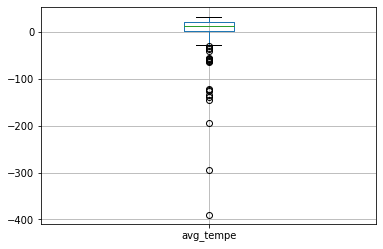

In [8]:
df_weather2.describe()
df_weather2.columns = [0, 'max_tempe', 'min_tempe', 'avg_tempe', 'humidity']
df_weather2.boxplot(column=['avg_tempe'])

In [9]:
df_weather2['min_tempe'][df_weather2['min_tempe'] < -800] = df_weather2['min_tempe'].median()
df_weather2['avg_tempe'][df_weather2['avg_tempe'] < -40] = df_weather2['avg_tempe'].median()
df_weather2['humidity'][df_weather2['humidity'] < -8000] = df_weather2['humidity'].median()
df_weather2['humidity'][df_weather2['humidity'] > 2000] = df_weather2['humidity'].median()

### Clean df_load

In [10]:
df_load = df_load.drop(df_load.tail(1).index)

In [11]:
df_load.describe()

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
count,1.982000e+03,1976.000000,1976.000000,1976.000000,1976.000000,1972.000000,1972.000000,1974.000000,1978.00000,1982.000000,...,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000
mean,2.005300e+07,5438.957415,5296.542038,5199.335661,5115.706636,5040.616516,4978.240096,4923.101357,4875.46231,4829.362481,...,7155.948405,7007.059853,6818.969754,6607.438054,6418.324626,6222.487082,6034.647051,5913.518844,5732.403169,5593.021167
std,1.575579e+04,1064.469944,1046.324666,1028.029385,1012.116627,992.542107,981.111482,970.474622,961.42376,951.465621,...,1254.141960,1235.642662,1210.928656,1191.878206,1170.281728,1143.990602,1120.305772,1123.329965,1102.762447,1078.868550
min,2.003010e+07,0.000000,0.000000,0.000000,0.000000,3046.642000,2954.600000,2971.796000,2927.28200,2907.597000,...,4396.064000,4283.661000,4204.319000,4038.958000,3908.160000,3762.538000,3643.880000,3562.089000,3437.745000,3364.128000
25%,2.004051e+07,4633.746250,4503.136750,4416.087750,4344.240000,4287.220750,4221.028550,4183.302000,4143.24800,4098.477000,...,6207.039000,6076.723000,5915.450000,5707.315000,5547.312000,5358.345000,5190.413000,5066.505000,4899.429000,4771.159000
50%,2.005092e+07,5314.726500,5181.434500,5082.201000,5009.332500,4933.562500,4872.214500,4818.606000,4776.66600,4732.843000,...,7064.995000,6899.171000,6696.886000,6468.097000,6272.693000,6084.236000,5883.997000,5785.825000,5612.405000,5486.935000
75%,2.007013e+07,6203.480175,6055.224050,5932.485750,5836.207000,5745.930500,5658.375000,5594.356975,5544.25750,5496.509250,...,8056.921000,7878.113300,7689.145000,7459.803000,7244.452000,7031.699000,6828.514000,6715.711000,6517.183000,6388.019500
max,2.008060e+07,8275.041000,8009.435100,7903.847700,7790.357400,7693.942900,7592.943800,7547.238800,7428.64750,7429.125000,...,11207.357400,10994.650400,10768.257800,10381.432600,10139.838900,9734.723600,9397.501000,8999.505900,8695.804700,8456.552700


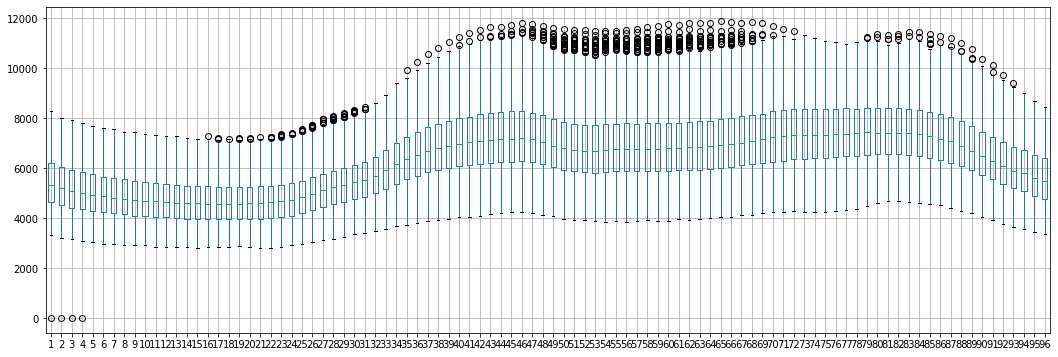

In [12]:
column_list = list(range(1, 97))
plt.figure(figsize=(18,6))
df_load.boxplot(column=column_list,figsize=(20, 4))
plt.savefig('../img/load_boxplot.png')

In [13]:
for i in range(1, 5):
    df_load[i][df_load[i] == 0] = df_load[i].median()

In [14]:
print(df_load.isna().sum())
df_load = df_load.fillna(axis=0, method='ffill')

0     0
1     6
2     6
3     6
4     6
     ..
92    1
93    1
94    1
95    1
96    1
Length: 97, dtype: int64


### merge the two df

In [15]:
df_data = pd.merge(df_load, df_weather2, how='left', on=[0, 0])

In [16]:
for column in ['max_tempe', 'min_tempe', 'avg_tempe', 'humidity']:
    index = df_data[column][df_data[column].isna()].index
    for idx in index:
        if idx - 365 > 0:
            df_data.at[idx, column] = df_data.at[idx - 365, column]
        else:
            df_data.at[idx, column] = df_data.at[idx + 2 * 365, column]
    # print(index)

In [17]:
df_data.isna().sum()

0            0
1            0
2            0
3            0
4            0
            ..
96           0
max_tempe    0
min_tempe    0
avg_tempe    0
humidity     0
Length: 101, dtype: int64

In [18]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from chinese_calendar import is_holiday
cal = calendar()
holidays = cal.holidays(start=df_data[0].min(), end=df_data[0].max())

def my_isholiday(s):
    if s < pd.Timestamp('2004-01-01'):
        return s in holidays
    else:
        return is_holiday(s)

In [19]:
df_data[0] = pd.to_datetime(df_data[0], format='%Y%m%d')
df_data['type_of_day'] = df_data[0].apply(lambda s : s.dayofweek).astype('object')
df_data['holiday'] = df_data[0].apply(my_isholiday).astype('object')
df_data = pd.get_dummies(df_data)

In [20]:
df_data.tail(5)
# df_data.to_csv('./data/data.csv')

,0,1,2,3,4,5,6,7,8,9,...,humidity,type_of_day_0,type_of_day_1,type_of_day_2,type_of_day_3,type_of_day_4,type_of_day_5,type_of_day_6,holiday_False,holiday_True
1977,2008-05-31,6025.465,5793.549,5669.668,5539.2590,5426.2040,5347.2920,5263.6540,5159.7040,5113.245,...,58.0,0,0,0,0,0,1,0,0,1
1978,2008-06-01,5866.092,5633.936,5503.146,5430.8470,5345.9330,5253.1850,5127.4320,5026.8580,5038.312,...,62.0,0,0,0,0,0,0,1,0,1
1979,2008-06-02,5415.645,5318.883,5286.144,5191.3030,5040.6930,5004.6370,4979.5040,4889.4960,4830.314,...,88.0,1,0,0,0,0,0,0,1,0
1980,2008-06-03,5701.626,5466.878,5395.250,5391.3032,5240.6929,5204.6372,5179.5039,5089.4961,5030.314,...,86.0,0,1,0,0,0,0,0,1,0
1981,2008-06-04,5419.921,5405.672,5262.052,5221.3390,5105.3630,5030.9440,4965.3460,4940.7060,4873.845,...,84.0,0,0,1,0,0,0,0,1,0


In [21]:

data_norm = df_data.iloc[:, 1:].values.astype('float64', copy=False)
data_norm[:, :96] = (data_norm[:, :96] / 7000)
data_norm[:, 96:99] = data_norm[:, 96:99] / 20
data_norm[:, 99] = data_norm[:, 99] / 100
print(data_norm.shape)

(1982, 109)


In [22]:
Y = data_norm[7:, :96]
X = np.zeros((1975, 685))
for idx in range(7, len(data_norm)):
    X[idx-7] = np.append(data_norm[idx-7:idx, :96], data_norm[idx, 96:])

In [23]:
np.savetxt('../data/features.csv', X, delimiter=",")
np.savetxt('../data/labels.csv', Y, delimiter=",")

In [24]:
labels = torch.tensor(Y, dtype=torch.float32)
labels = labels.to('cuda')
features = torch.tensor(X, dtype=torch.float32)
features = features.to('cuda')

In [25]:
import torch.nn as nn
from torch.nn import init

def get_net(num_inputs=685, num_hiddens1 = 520, num_outputs=96):
    net = nn.Sequential(
        nn.Linear(num_inputs, num_hiddens1),
        nn.ReLU(),
        nn.Linear(num_hiddens1, num_outputs)
    )
    for params in net.parameters():
        init.normal_(params, mean=0, std=0.01)
    net.to('cuda')
    return net


In [26]:
def accuary(y_pred, y_real):
    return 1 - np.sqrt(np.mean(((y_pred - y_real) / y_real) ** 2, axis=1))

In [27]:
def train(net, train_features, train_labels, test_features, test_labels, 
          num_epochs, learning_rate, batch_size):
    train_ls, test_ls = [], []
    train_accus, test_accus = [], []
    best_test_accu = 0
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)
    optimizer = torch.optim.Adam(params=net.parameters(), lr=learning_rate) 
    net = net.float()
    for epoch in range(num_epochs):
        net.train(True)
        for X, y in train_iter:
            loss = torch.nn.MSELoss()
            l = loss(net(X.float()), y.float())
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_ls.append(l)
        net.eval()
        train_accu = accuary(net(train_features).detach().cpu().numpy(), train_labels.detach().cpu().numpy())
        train_accus.append(train_accu.mean())
        if test_labels is not None:
            test_l = loss(net(test_features), test_labels)
            test_ls.append(test_l)
            test_accu = accuary(net(test_features).detach().cpu().numpy(), test_labels.detach().cpu().numpy())
            test_accus.append(test_accu.mean())
            if test_accu.mean() > best_test_accu:
                torch.save(net, './model.pt')
                best_test_accu = test_accu.mean()
        if epoch % 10 == 0:
            print('epooch %d: train mse %.4f, test mes %.4f, train accuary %.4f, test accuary %.4f' % (epoch, l, test_l, train_accu.mean(), test_accu.mean()))
    return train_ls, test_ls, train_accus, test_accus

In [28]:
train_index = np.arange(0, len(X)-155)
test_index = np.arange(len(X)-155, len(X))
train_feautures = features[train_index]
train_labels = labels[train_index]
test_feautures = features[test_index]
test_labels = labels[test_index]


Sequential(
  (0): Linear(in_features=685, out_features=520, bias=True)
  (1): ReLU()
  (2): Linear(in_features=520, out_features=96, bias=True)
)
epooch 0: train mse 0.0049, test mes 0.0046, train accuary 0.9323, test accuary 0.9417
epooch 10: train mse 0.0017, test mes 0.0018, train accuary 0.9612, test accuary 0.9651
epooch 20: train mse 0.0011, test mes 0.0018, train accuary 0.9627, test accuary 0.9646
epooch 30: train mse 0.0015, test mes 0.0020, train accuary 0.9567, test accuary 0.9620
epooch 40: train mse 0.0020, test mes 0.0017, train accuary 0.9643, test accuary 0.9650
epooch 50: train mse 0.0017, test mes 0.0016, train accuary 0.9613, test accuary 0.9682
epooch 60: train mse 0.0012, test mes 0.0024, train accuary 0.9570, test accuary 0.9554
epooch 70: train mse 0.0021, test mes 0.0017, train accuary 0.9654, test accuary 0.9646
epooch 80: train mse 0.0019, test mes 0.0016, train accuary 0.9654, test accuary 0.9663
epooch 90: train mse 0.0016, test mes 0.0015, train accuary 0.

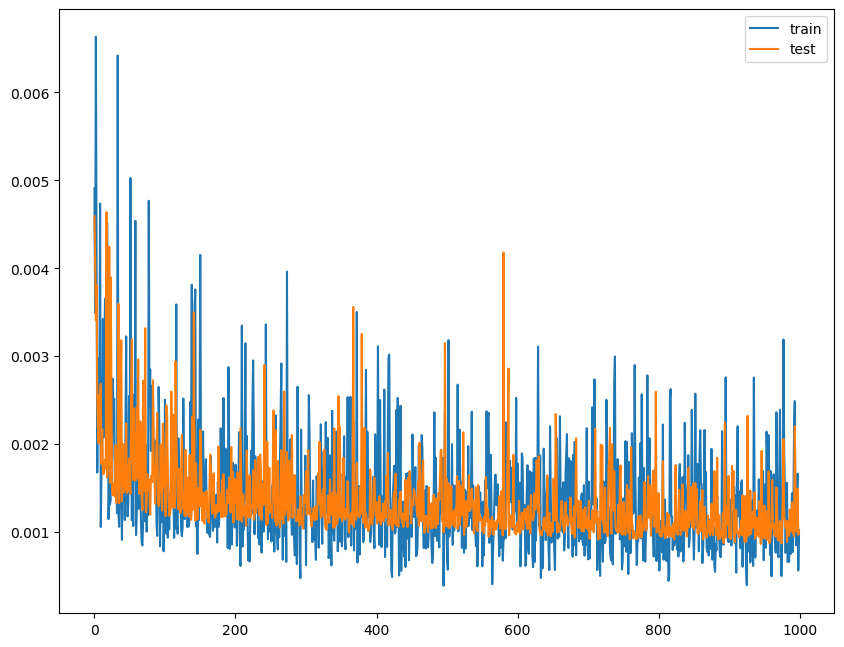

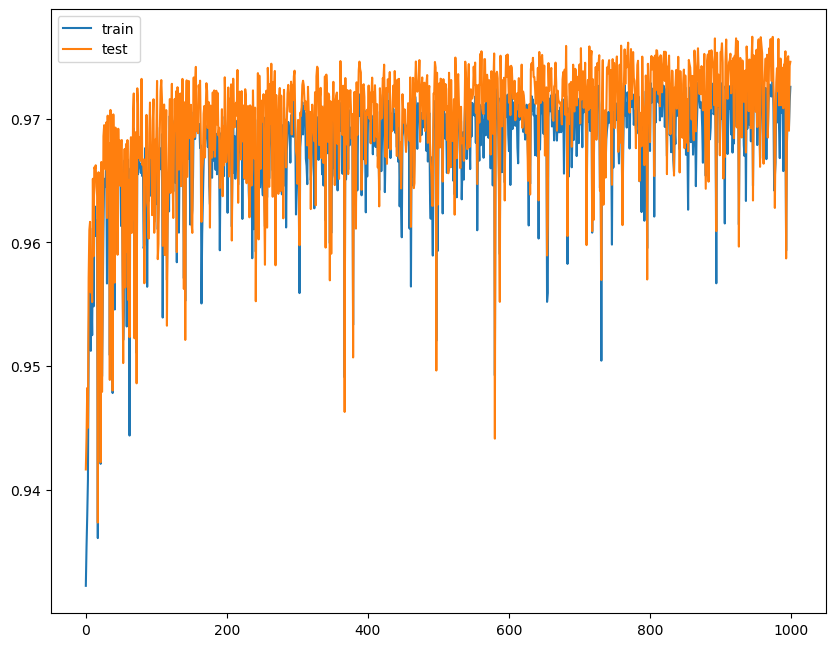

In [192]:
net = get_net()
print(net)
num_epochs, learning_rate, batch_size = 1000, 1e-3, 32
train_ls, test_ls, train_accus, test_accus= train(net, train_feautures, train_labels, test_feautures, test_labels, num_epochs, learning_rate, batch_size)


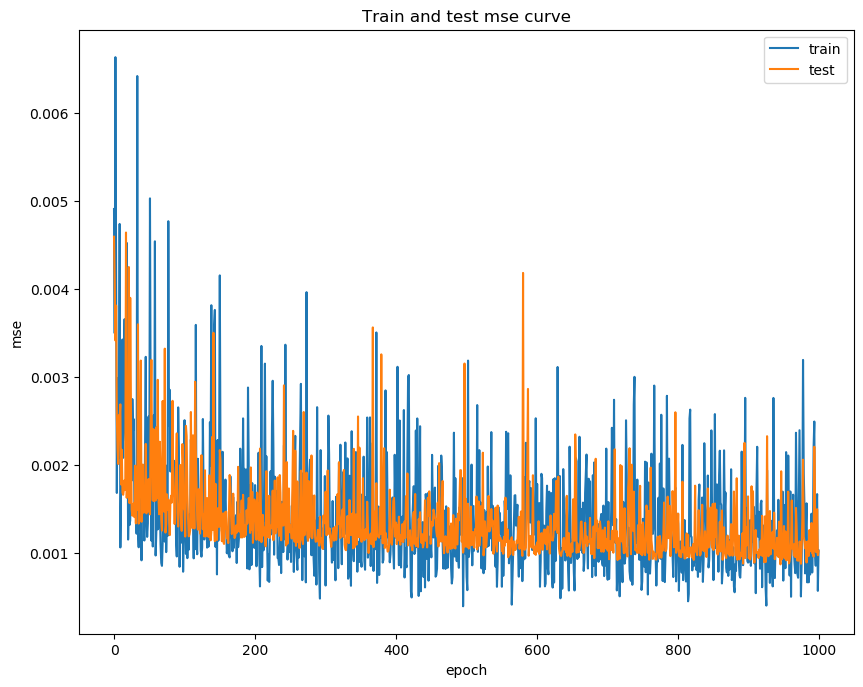

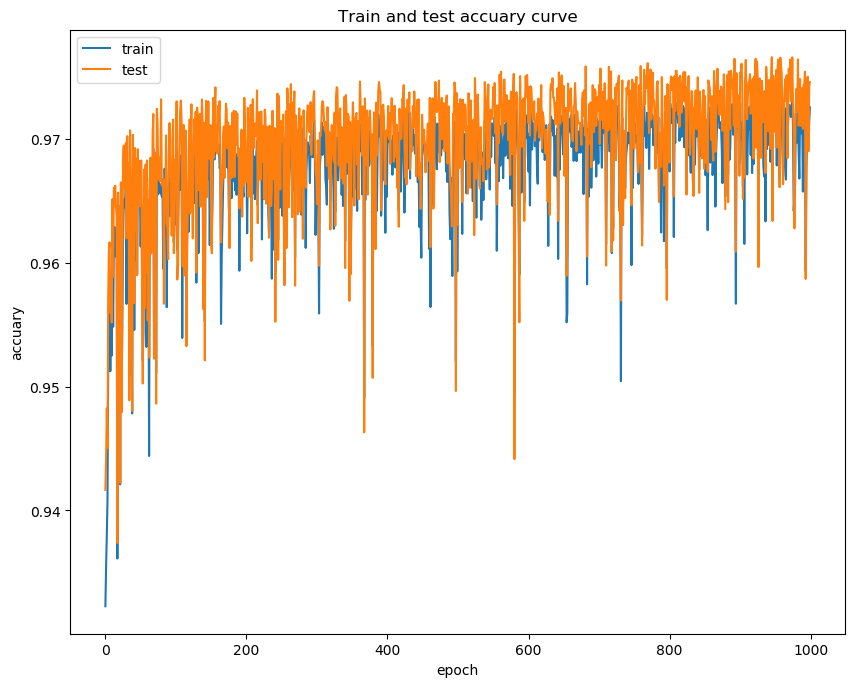

In [201]:
plt.figure(figsize=(10, 8), dpi=100)
plt.plot(train_ls, label='train')
plt.plot(test_ls, label='test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('mse')
plt.title('Train and test mse curve')
plt.savefig('../img/train_test_mse.png')

plt.figure(figsize=(10, 8), dpi=100)
plt.plot(train_accus, label='train')
plt.plot(test_accus, label='test')
plt.xlabel('epoch')
plt.ylabel('accuary')
plt.title('Train and test accuary curve')
plt.legend()
plt.savefig('../img/train_test_accu.png')

In [212]:
best_epoch = np.array(test_ls).argmin()
print('test best mse: %.6f' % test_ls[best_epoch])
print('test best accuary: ', test_accus[best_epoch])

test best mse: 0.000865
test best accuary:  0.9766183


0.9766183
[  1  33  34  35  36  88  93 120 123 148]


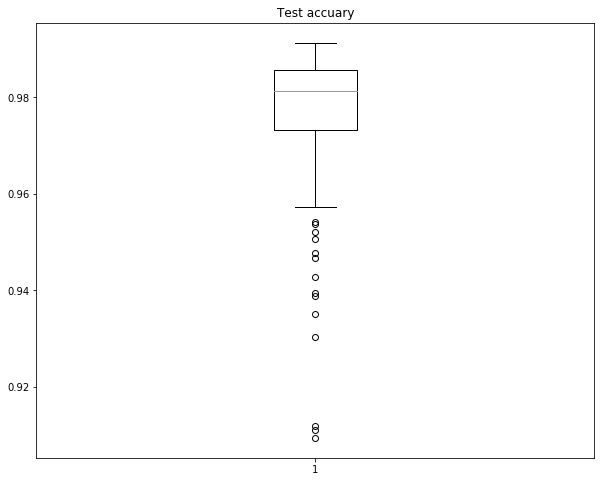

In [61]:

net = torch.load('./model.pt')
net.eval()
y_pred = net(test_feautures).cpu().detach().numpy()
y_real = test_labels.cpu().detach().numpy()
precision = accuary(y_pred, y_real)
something_wrong = np.where(precision < 0.95)[0]
plt.figure(figsize=(10, 8))
plt.boxplot(precision)
plt.title('Test accuary')
plt.savefig('../img/accu_box.png')
print(np.array(precision).mean())
print((something_wrong))

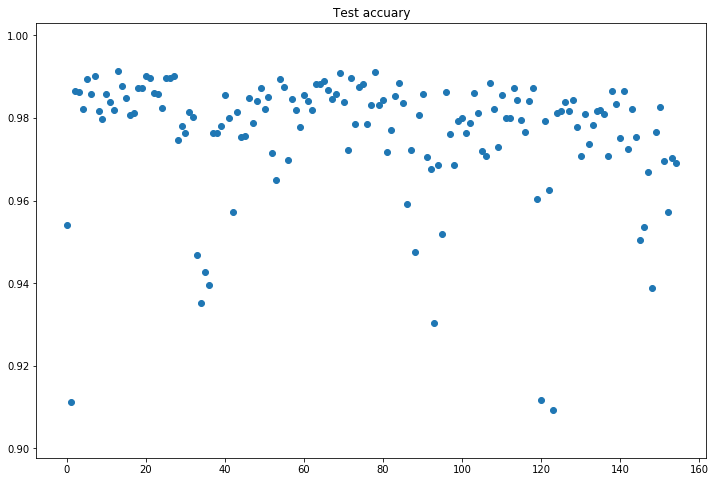

In [32]:
plt.figure(figsize=(12,8))
plt.scatter(range(155), precision)
plt.title('Test accuary')
plt.savefig('../img/accu_scatter.png')

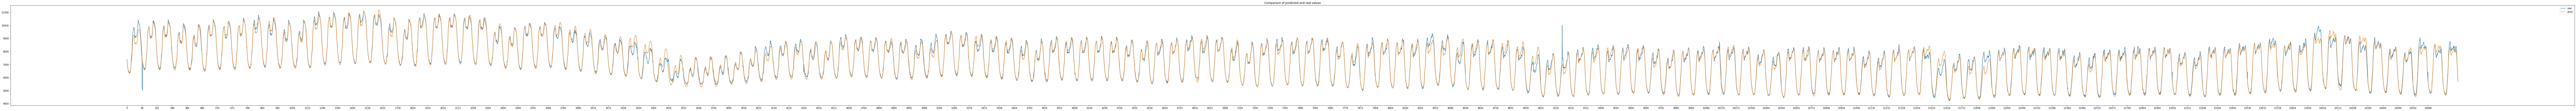

In [198]:
y_pred = y_pred.reshape((-1, 1))
y_real = y_real.reshape((-1, 1))
plt.figure(figsize=(200, 8))
plt.plot(y_real * 7000, label='real')
plt.plot(y_pred * 7000, label='pred')
plt.xticks(np.arange(0, 96 * 154, 96))
plt.legend()
plt.title('Comparison of predicted and real values')
plt.savefig('../img/real_pred.png')

In [62]:
print(np.array(something_wrong) * 96)

[   96  3168  3264  3360  3456  8448  8928 11520 11808 14208]


0.9913417


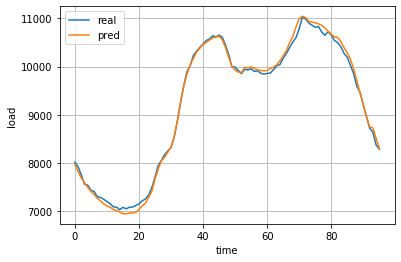

In [36]:
print_index = precision.argmax()
plt.figure()
plt.plot(y_real[print_index].reshape((-1, 1)) * 7000)
plt.plot(y_pred[print_index].reshape((-1, 1)) * 7000)
plt.legend(['real', 'pred'])
plt.xlabel('time')
plt.ylabel('load')
plt.grid()
plt.savefig('../img/real_pred1.png')
print(precision[print_index])

In [69]:
df_temp = df_data.iloc[-155:, [0, 109]]
df_temp = df_temp.iloc[something_wrong, :]

In [72]:
df_temp['idx'] = np.array(something_wrong) * 96
df_temp['precision'] = precision[something_wrong]

In [73]:
df_temp

,0,holiday_True,idx,precision
1828,2008-01-03,0,96,0.911176
1860,2008-02-04,0,3168,0.946772
1861,2008-02-05,0,3264,0.935196
1862,2008-02-06,1,3360,0.942717
1863,2008-02-07,1,3456,0.939535
1915,2008-03-30,1,8448,0.947668
1920,2008-04-04,1,8928,0.930457
1947,2008-05-01,1,11520,0.911831
1950,2008-05-04,0,11808,0.909432
1975,2008-05-29,0,14208,0.938946


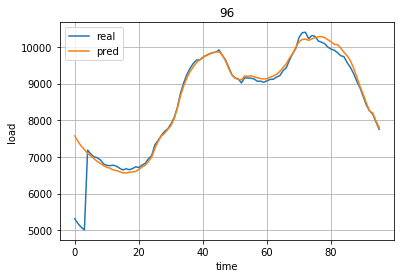

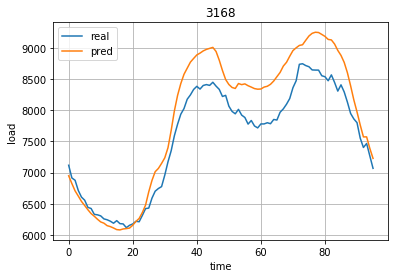

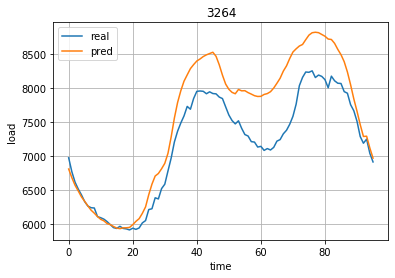

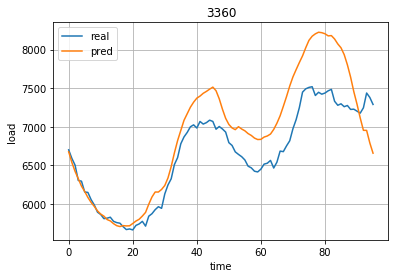

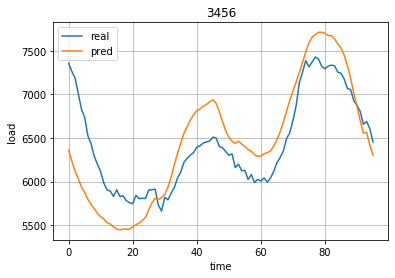

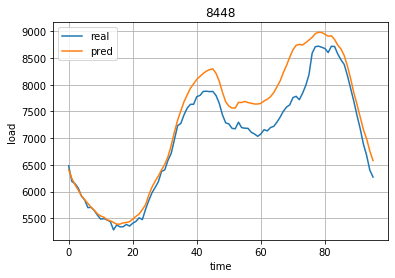

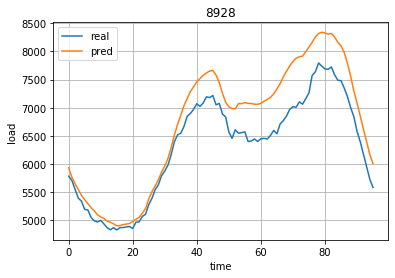

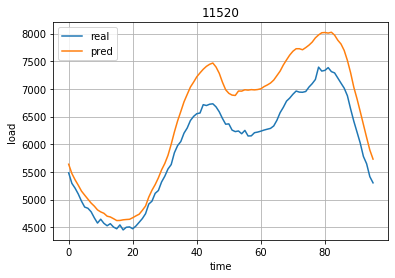

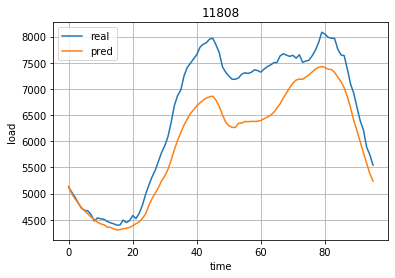

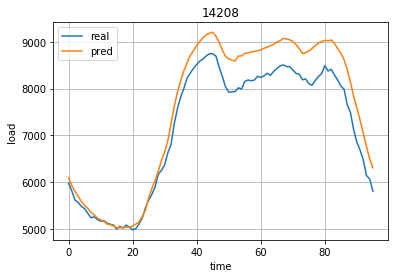

In [75]:
for print_index in something_wrong:
    plt.figure()
    plt.plot(y_real[print_index].reshape((-1, 1)) * 7000)
    plt.plot(y_pred[print_index].reshape((-1, 1)) * 7000)
    plt.legend(['real', 'pred'])
    plt.xlabel('time')
    plt.ylabel('load')
    plt.grid()
    plt.title(96 * print_index)